# Analysing US Medical Insurance data
### Portfolio project

#### Step 1: Importing the data (insurance.csv)

In [2]:
import csv
def import_data(file):
    insurance_data = []
    with open(file) as data_file:
        data_reader = csv.DictReader(data_file)
        for row in data_reader:
            insurance_data.append(row)
    # print("Total number of persons in the dataset : {}".format(len(insurance_data)))
    return insurance_data

#### Step 2: Creating separate lists for each of the columns.

In [3]:
file_name = 'D:/Learning/Codeacademy_projects/portfolio-proj-1/data_files/insurance.csv'
# calling the import data function
imported_data = import_data(file_name)
headers_list = list(imported_data[0])
age_list = []
sex_list = []
bmi_list = []
children_list = []
smoker_list = []
region_list = []
charges_list = []

for row in imported_data:
    age_list.append(int(row['age']))
    sex_list.append(row['sex'])
    bmi_list.append(float(row['bmi']))
    children_list.append(int(row['children']))
    smoker_list.append(row['smoker'])
    region_list.append(row['region'])
    charges_list.append(float(row['charges']))

#### Step 3: Analysing the dataset

- Summary stats on categorical variables
    - ###### on Gender, Smoker and Region.

How many patients of each gender?
Total males: 676
  Smokers: 159(23.5%)
Total females: 662
  Smokers: 115(17.4%)


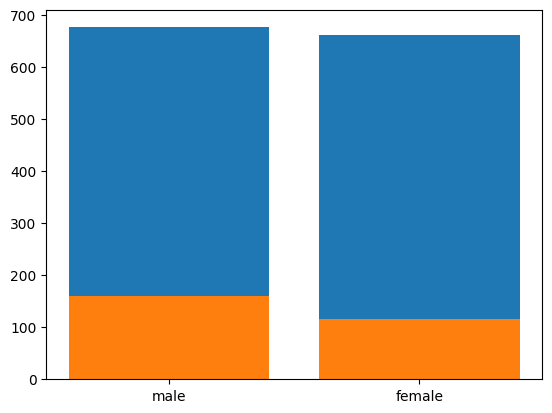

Total smokers: 274

How many patients from each region?
northeast: 324
  Smokers: 67(20.7%)
  Avg. charges: 13406.38
southwest: 325
  Smokers: 58(17.8%)
  Avg. charges: 12346.94
southeast: 364
  Smokers: 91(25.0%)
  Avg. charges: 14735.41
northwest: 325
  Smokers: 58(17.8%)
  Avg. charges: 12417.58


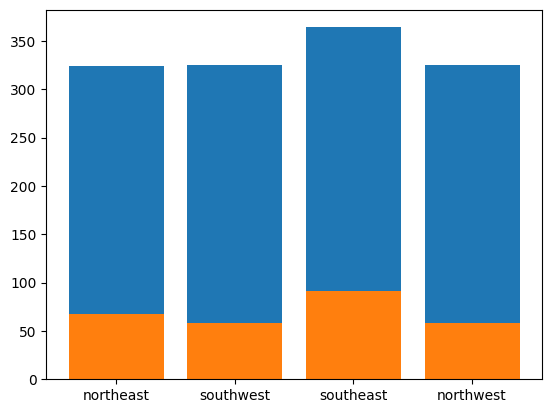

In [31]:
import statistics, matplotlib.pyplot as plt, numpy as np

# Get all unique values in the respective columns.
all_gender = set(sex_list)
all_smoker = set(smoker_list)
all_regions = set(region_list)

print("How many patients of each gender?")
gender_count = []
gender_count_smoker = []
for gender in all_gender:
    print("Total {}s: {}".format(gender, sex_list.count(gender)))
    gender_count.append(sex_list.count(gender))
    sm_count = 0
    for row in imported_data:
        if(row['sex'] == gender and row['smoker'] == 'yes'):
            sm_count += 1
    gender_count_smoker.append(sm_count)
    sm_pct = round(sm_count / sex_list.count(gender) *100,1)
    print("  Smokers: {}({}%)".format(sm_count,sm_pct))

x = np.array(list(all_gender))
y = np.array(gender_count)
plt.bar(x, y)

y = np.array(gender_count_smoker)
plt.bar(x, y)
plt.show()


# print("\nHow many smokers?")
print("Total smokers: {}".format(smoker_list.count("yes")))

print("\nHow many patients from each region?")
region_count = []
region_count_smoker = []
region_smoker_list = {}
region_non_smoker_list = {}
for region in all_regions:
    print("{}: {}".format(region,region_list.count(region)))
    region_count.append(region_list.count(region))
    region_smoker_list[region] = []
    region_non_smoker_list[region] = []

    sm_count = 0
    region_charges = []
    for row in imported_data:
        if(row['region'] == region and row['smoker'] == 'yes'):
            sm_count += 1
            region_smoker_list[region].append(row['age'])
        else:
            region_non_smoker_list[region].append(row['age'])

        if(row['region'] == region):
            region_charges.append(float(row['charges']))
    region_count_smoker.append(sm_count)
    sm_pct = round(sm_count / region_list.count(region) *100,1)
    print("  Smokers: {}({}%)".format(sm_count,sm_pct))

    print("  Avg. charges: {}".format(round(statistics.mean(region_charges),2)))

# print(region_smoker_list)

x = np.array(list(all_regions))
y = np.array(region_count)
plt.bar(x, y)

y = np.array(region_count_smoker)
plt.bar(x, y)
plt.show()



---------------
- Summary stats on Numerical variables
    - ###### on age, bmi, children and charges.

On Age..

In [5]:
print("Average age of patients in the dataset is {} years.".format(round(statistics.mean(age_list),2)))
print("Median age: {}".format(round(statistics.median(age_list),2)))
print("Mode age: {}".format(round(statistics.mode(age_list),2)))

Average age of patients in the dataset is 39.21 years.
Median age: 39.0
Mode age: 18


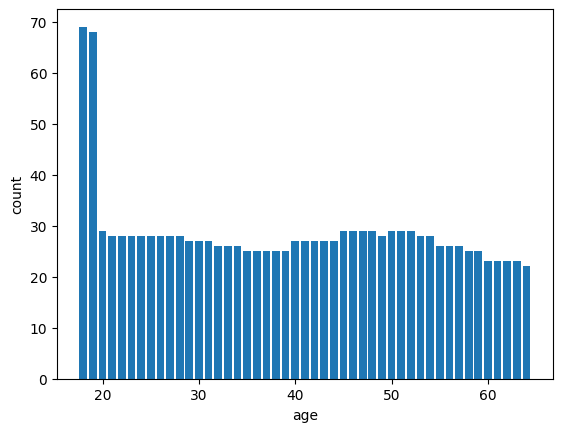

Standard deviation of ages: 14.04
IQR of ages: 24.0


In [6]:
import matplotlib.pyplot as plt
import numpy as np

all_ages = set(age_list)
ages_count = dict.fromkeys(all_ages,0)
for row in imported_data:
    ages_count[int(row['age'])] += 1

x = np.array(list(ages_count.keys()))
y = np.array(list(ages_count.values()))

plt.bar(x,y)
plt.xlabel("age")
plt.ylabel("count")
plt.show()

print("Standard deviation of ages: {}".format(round(statistics.pstdev(age_list),2)))
print("IQR of ages: {}".format(round(np.quantile(age_list,0.75) - np.quantile(age_list,0.25),2)))

---------------
On bmi..

Average bmi: 30.66
Median bmi: 30.4
Mode bmi: 32.3


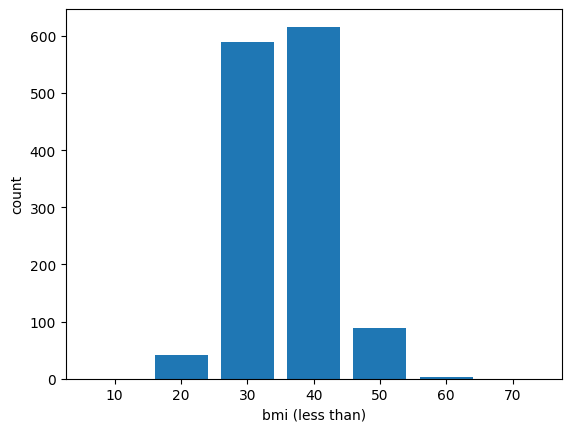

Standard deviation of bmi: 6.1
IQR of bmi: 8.4


In [7]:
print("Average bmi: {}".format(round(statistics.mean(bmi_list),2)))
print("Median bmi: {}".format(round(statistics.median(bmi_list),2)))
print("Mode bmi: {}".format(round(statistics.mode(bmi_list),2)))

all_bmis = set(bmi_list)
groups_bmi_list = list(range(10,80,10))
groups_bmi_dict = dict.fromkeys(groups_bmi_list,0)
# bmis_count = dict.fromkeys(all_bmis,0)
for row in imported_data:
    bmi = float(row['bmi'])
    # bmis_count[bmi] += 1
    for group in groups_bmi_list:
        if(bmi < group):
            groups_bmi_dict[group] += 1
            break

x = np.array(list(groups_bmi_dict.keys()))
y = np.array(list(groups_bmi_dict.values()))

plt.bar(x,y, width=8)
plt.xlabel("bmi (less than)")
plt.ylabel("count")
plt.show()

print("Standard deviation of bmi: {}".format(round(statistics.pstdev(bmi_list),2)))
print("IQR of bmi: {}".format(round(np.quantile(bmi_list,0.75) - np.quantile(bmi_list,0.25),2)))

---------------
On children count..

Average count of children: 1.09
Median count: 1.0
Mode count: 0
Average age of patients with children is 39.78 years.


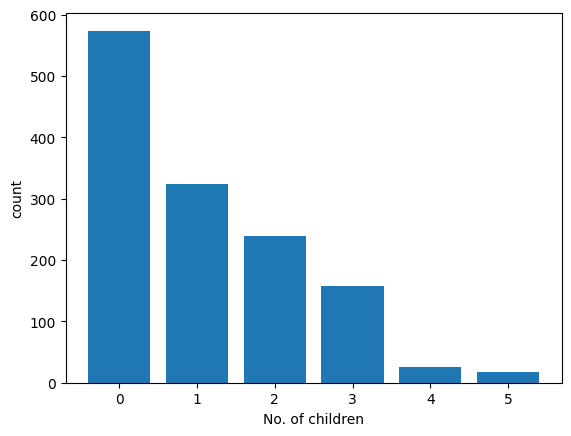

In [8]:
print("Average count of children: {}".format(round(statistics.mean(children_list),2)))
print("Median count: {}".format(round(statistics.median(children_list),2)))
print("Mode count: {}".format(round(statistics.mode(children_list),2)))

all_children = set(children_list)
children_count = dict.fromkeys(all_children,0)
ages_list_children = []
ages_list_no_children = []
for row in imported_data:
    child_count = float(row['children'])
    children_count[child_count] += 1

    if child_count >0:
        ages_list_children.append(int(row['age']))
    else:
        ages_list_no_children.append(int(row['age']))

print("Average age of patients with children is {} years.".format(round(statistics.mean(ages_list_children),2)))
# print("Average age of patients with no children is {} years.".format(round(statistics.mean(ages_list_no_children),2)))
x = np.array(list(children_count.keys()))
y = np.array(list(children_count.values()))

plt.bar(x,y)
plt.xlabel("No. of children")
plt.ylabel("count")
plt.show()

# print("Standard deviation of ages: {}".format(round(statistics.pstdev(children_list),2)))
# print("IQR of ages: {}".format(round(np.quantile(children_list,0.75) - np.quantile(children_list,0.25),2)))

---------------
On charges..

min charges: 1121.8739
max charges: 63770.42801
Average charges: 13270.42
Median charges: 9382.03
Mode charges: 1639.56


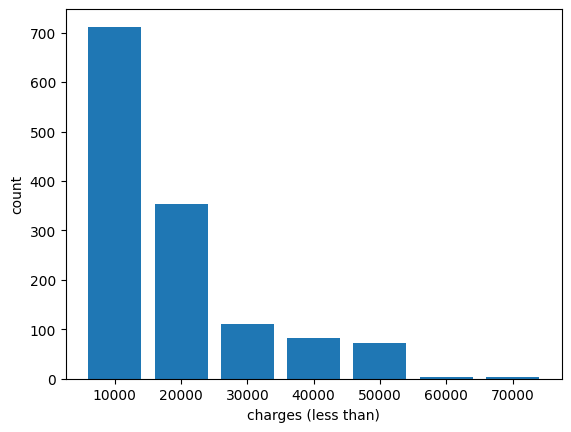

Standard deviation of charges: 12105.48
IQR of charges: 11899.63


In [9]:
print("min charges: {}".format(min(charges_list)))
print("max charges: {}".format(max(charges_list)))
print("Average charges: {}".format(round(statistics.mean(charges_list),2)))
print("Median charges: {}".format(round(statistics.median(charges_list),2)))
print("Mode charges: {}".format(round(statistics.mode(charges_list),2)))

# all_charges = set(charges_list)
groups_charges_list = list(range(10000,71000,10000))
groups_charges_dict = dict.fromkeys(groups_charges_list, 0)

for row in imported_data:
    charge = float(row['charges'])
    for group in groups_charges_list:
        if(charge < group):
            groups_charges_dict[group] += 1
            break

x = np.array(list(groups_charges_dict.keys()))
y = np.array(list(groups_charges_dict.values()))

plt.bar(x,y, width=8000)
plt.xlabel("charges (less than)")
plt.ylabel("count")
plt.show()

print("Standard deviation of charges: {}".format(round(statistics.pstdev(charges_list),2)))
print("IQR of charges: {}".format(round(np.quantile(charges_list,0.75) - np.quantile(charges_list,0.25),2)))

difference in charges between smokers and non-smokers.

In [25]:
charges_list_smoker = []
ages_list_smoker = []
charges_list_non_smoker = []
ages_list_non_smoker = []
children_list_smoker = []
children_list_non_smoker = []
bmi_list_smoker = []
bmi_list_non_smoker = []
for row in imported_data:
    if row['smoker'] == 'yes':
        charges_list_smoker.append(float(row['charges']))
        children_list_smoker.append(int(row['children']))
        ages_list_smoker.append(int(row['age']))
        bmi_list_smoker.append(float(row['bmi']))
    else:
        charges_list_non_smoker.append(float(row['charges']))
        children_list_non_smoker.append(int(row['children']))
        ages_list_non_smoker.append(int(row['age']))
        bmi_list_non_smoker.append(float(row['bmi']))

print("Average charges of smokers is {}.".format(round(statistics.mean(charges_list_smoker),2)))
print("Average charges of non-smokers is {}.".format(round(statistics.mean(charges_list_non_smoker),2)))

Average charges of smokers is 32050.23.
Average charges of non-smokers is 8434.27.


Scatter plots
1. x axis = charges, y axis = children, values = smoker
2. x axis = charges, y axis = age, values = smoker
3. x axis = charges, y axis = bmi, values = smoker
4. x axis = region, y axis = age, values = smoker

In [2]:
x = np.array(charges_list_smoker)
y = np.array(children_list_smoker)
plt.scatter(x,y)

x = np.array(charges_list_non_smoker)
y = np.array(children_list_non_smoker)
plt.scatter(x,y)

plt.show()

x = np.array(charges_list_smoker)
y = np.array(ages_list_smoker)
plt.scatter(x,y)

x = np.array(charges_list_non_smoker)
y = np.array(ages_list_non_smoker)
plt.scatter(x,y)

plt.show()

x = np.array(charges_list_smoker)
y = np.array(bmi_list_smoker)
plt.scatter(y,x)

x = np.array(charges_list_non_smoker)
y = np.array(bmi_list_non_smoker)
plt.scatter(y,x)

plt.show()

# for region in all_regions:
#     x = np.array(list(all_regions))
#     y = np.array(region_smoker_list[region])
#     plt.scatter(x, y)

# plt.show()

NameError: name 'np' is not defined